# High Resolution Measurements of Face-to-Face Contact
# Patterns in a Primary School
Day 1 and 2, comparison

In [1]:
# Commençons par importer les  librairies utiles ainsi que les données, sous forme de réseau.

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G01 = nx.read_gexf("../data/sp_data_school_day_1_g.gexf")
G02 = nx.read_gexf("../data/sp_data_school_day_2_g.gexf")

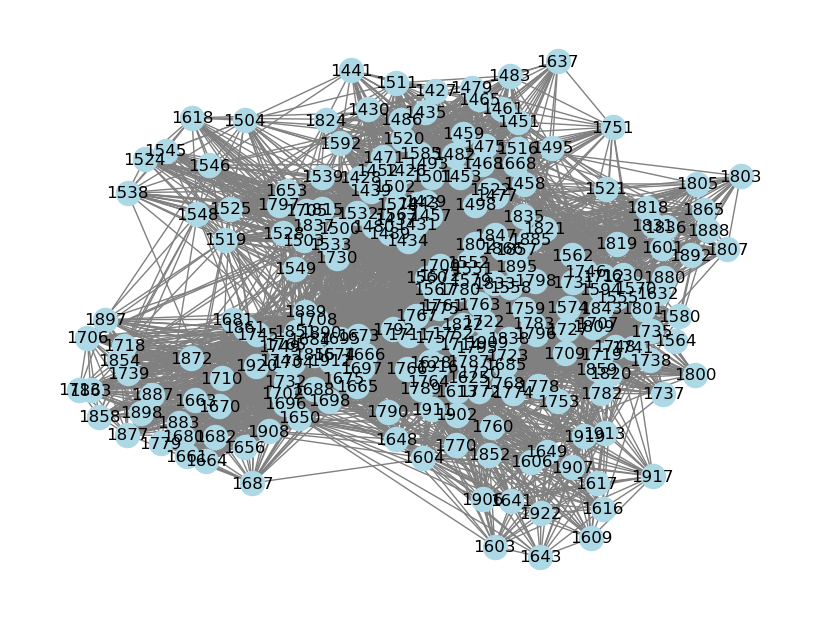

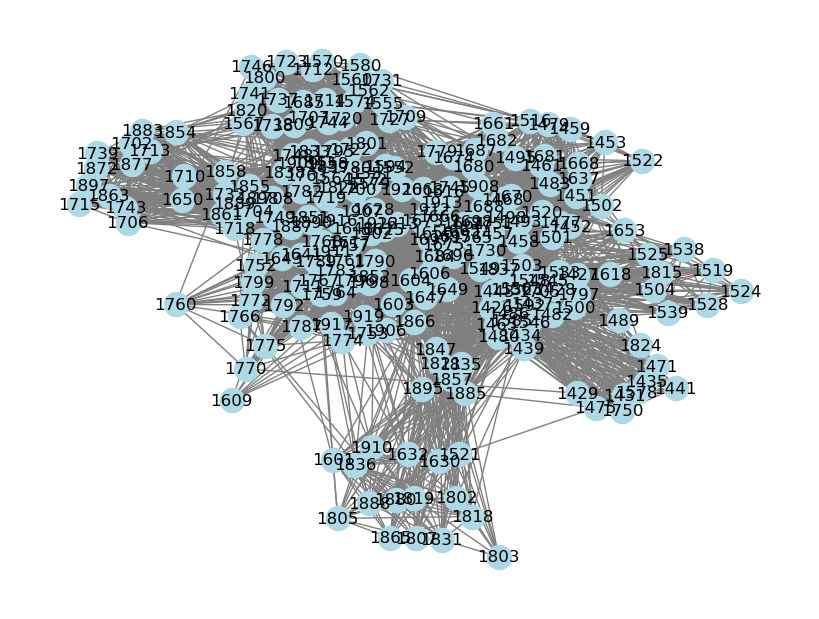

In [2]:
# Première représentation de notre graphe, première idée.

plt.figure(figsize=(8,6))
nx.draw(G01, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

plt.figure(figsize=(8,6))
nx.draw(G02, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

### Graphe simple
Une seule arête entre les noeuds mais pondérée par la somme des durées des contacts entre les noeuds

In [3]:
# Pour le graphe du jour 1
print("Jour 1:")
print(G01.nodes(data=True))
print(G01.edges(data=True))

# Pour le graphe du jour 2
print("Jour 2 :")
print(G02.nodes(data=True))
print(G02.edges(data=True))

Jour 1:
[('1789', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}), ('1780', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': 37.34756, 'y': 63.289124, 'z': 0.0}}, 'label': '1780'}), ('1782', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': -228.26913, 'y': 181.72375, 'z': 0.0}}, 'label': '1782'}), ('1783', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -64.468575, 'y': 80.36716, 'z': 0.0}}, 'label': '1783'}), ('1787', {'classname': '1A', 'gender': 'F', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -138.05147, 'y': -21.946629, 'z': 0.0}}, 'label': '1787'}), ('1546', {'classname': '4A', 'gender': 'F', 'viz': {'color': {'r': 252, 'g': 97, 

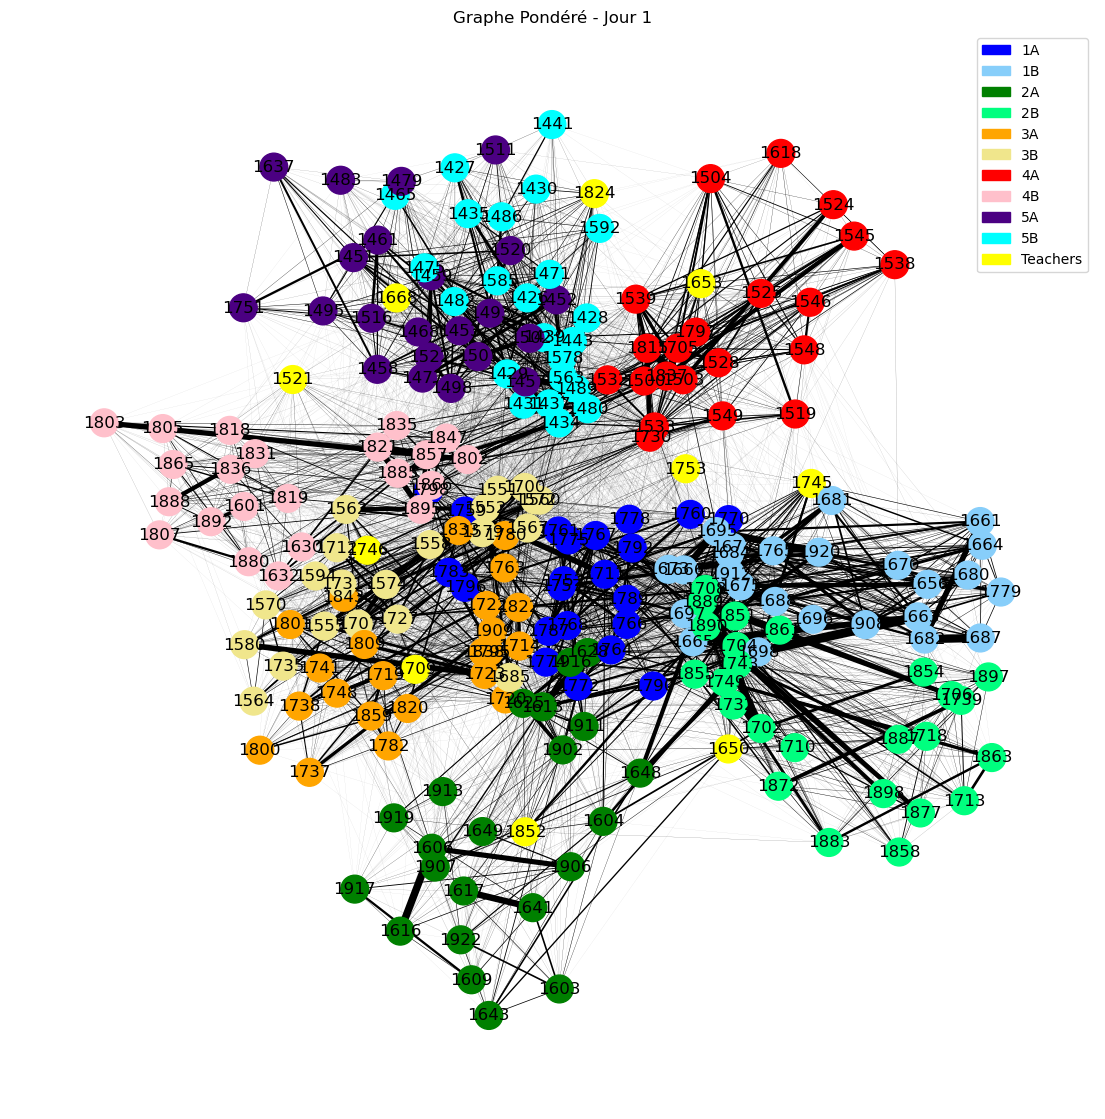

In [18]:
# Construction d’un graphe pondéré JOUR 1

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G1 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G01.nodes(data=True):
    
    G1.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G01.edges(data=True):
    
    w = data.get("duration", 1)
    G1.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G1.nodes[n].get("classname", "PAT"), "gray")
    for n in G1.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles
edges = G1.edges()
edge_weights = [G1[u][v]["duration"] for u, v in edges]
max_w = max(edge_weights)
edge_widths = [10 * w / max_w for w in edge_weights]

#note: Pourquoi *10 dans le calcule de la pondération?

nx.draw(
    G1,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 1")
plt.show()







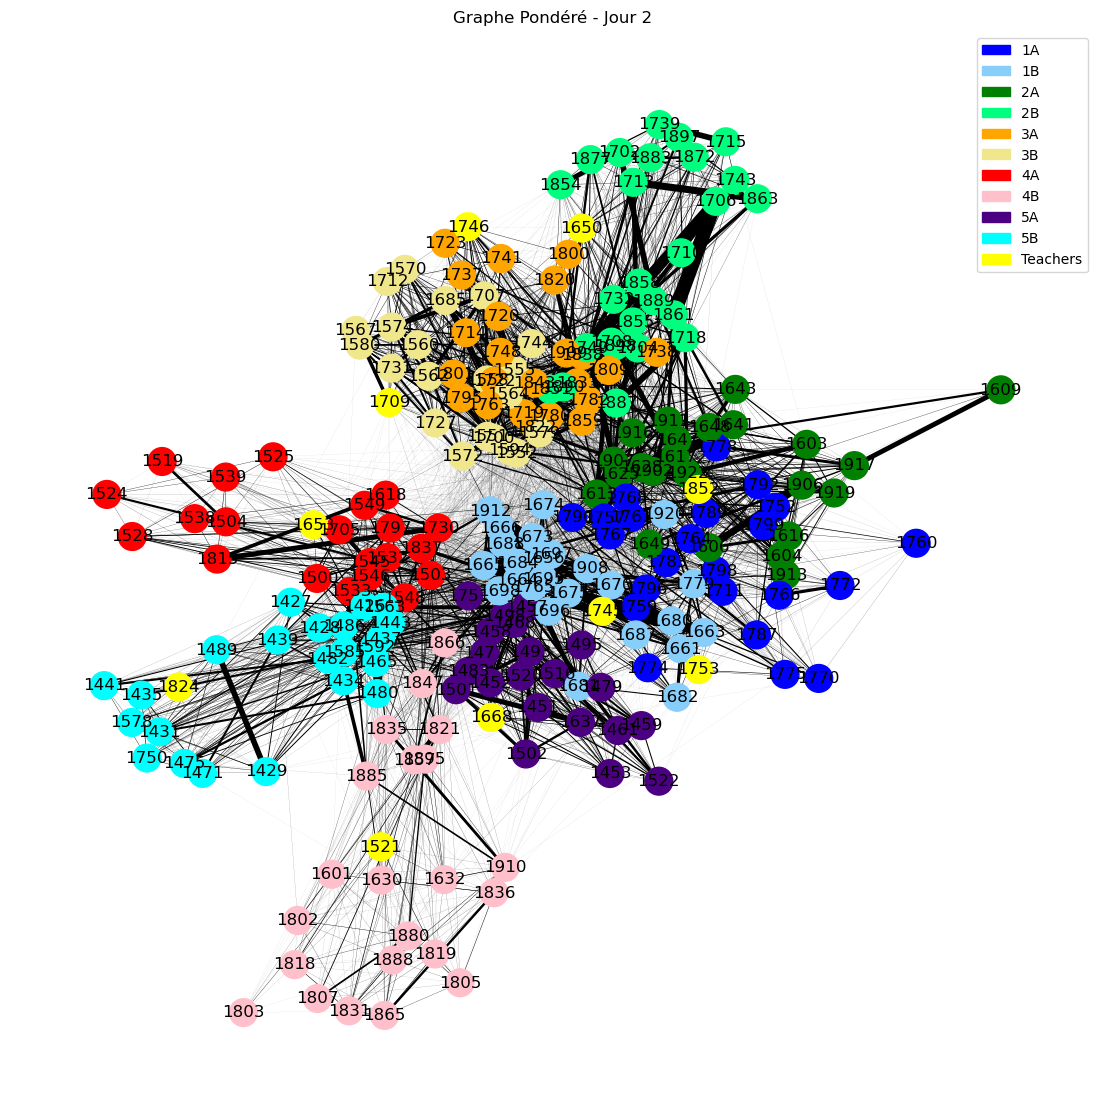

In [5]:
# Construction d’un graphe pondéré JOUR 2

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G2 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G02.nodes(data=True):
    
    G2.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G02.edges(data=True):
    
    w = data.get("duration", 1)
    G2.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G2.nodes[n].get("classname", "PAT"), "gray")
    for n in G2.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles
edges = G2.edges()
edge_weights = [G2[u][v]["duration"] for u, v in edges]
max_w = max(edge_weights)
edge_widths = [10 * w / max_w for w in edge_weights]

#note: Pourquoi *10 dans le calcule de la pondération?

nx.draw(
    G2,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 2")
plt.show()







In [6]:
print("Diamètre du Graphe 1:" , nx.diameter(G1))
print("Diamètre du Graphe 1:" , nx.diameter(G2))

Diamètre du Graphe 1: 3
Diamètre du Graphe 1: 3


QUELQUES ANALYSES

A. Distribution de degré


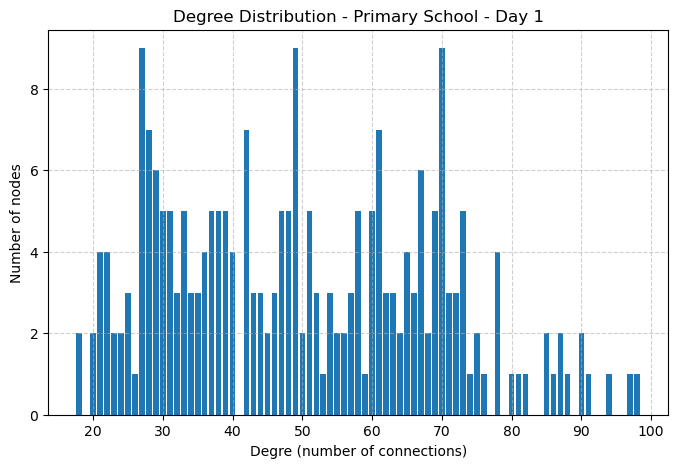

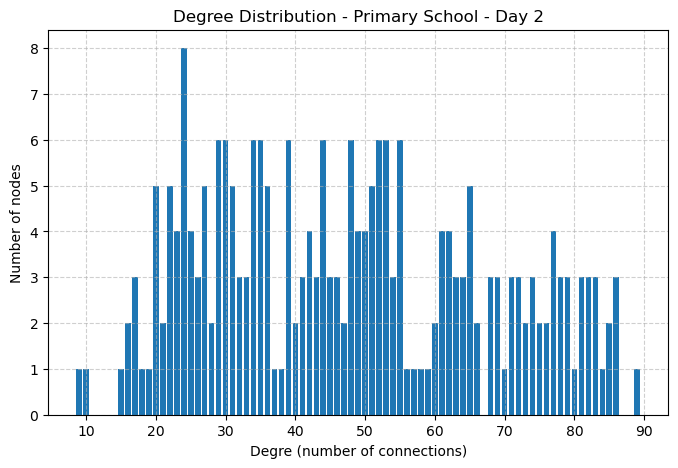

In [7]:
# Pour comprendre la structure du réseau, regardons sa distribution de degrés.

degrees1=[d for n , d in G1.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees1, bins=range(min(degrees1),max(degrees1)+2), align ='left', rwidth=0.8)

plt.title("Degree Distribution - Primary School - Day 1")
plt.xlabel("Degre (number of connections)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle = '--', alpha= 0.6)
plt.show()



degrees2=[d for n , d in G2.degree()]

plt.figure(figsize=(8,5))

plt.hist(degrees2, bins=range(min(degrees2),max(degrees2)+2), align ='right', rwidth=0.8)

plt.title("Degree Distribution - Primary School - Day 2")
plt.xlabel("Degre (number of connections)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle = '--', alpha= 0.6)
plt.show()

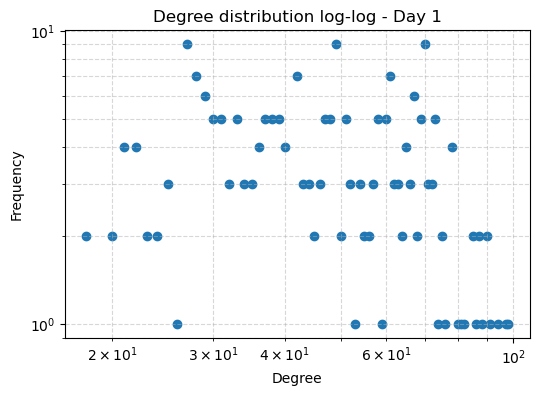

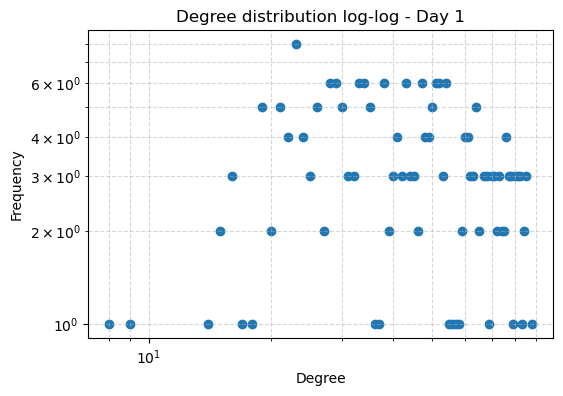

In [8]:
# Regardons si la distribution de degrés suit une Power Law (ce n'est pas le cas ici)

# Jour 1
degree_count = {}
for d in degrees1:
    degree_count[d] =degree_count.get(d,0)+1

x=np.array(list(degree_count.keys()))
y=np.array(list(degree_count.values()))

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree distribution log-log - Day 1")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True,which="both", linestyle='--',alpha= 0.5)
plt.show()

# Jour 2
degree_count = {}
for d in degrees2:
    degree_count[d] =degree_count.get(d,0)+1

x=np.array(list(degree_count.keys()))
y=np.array(list(degree_count.values()))

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree distribution log-log - Day 1")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True,which="both", linestyle='--',alpha= 0.5)
plt.show()

B. Distribution de degré pondérée


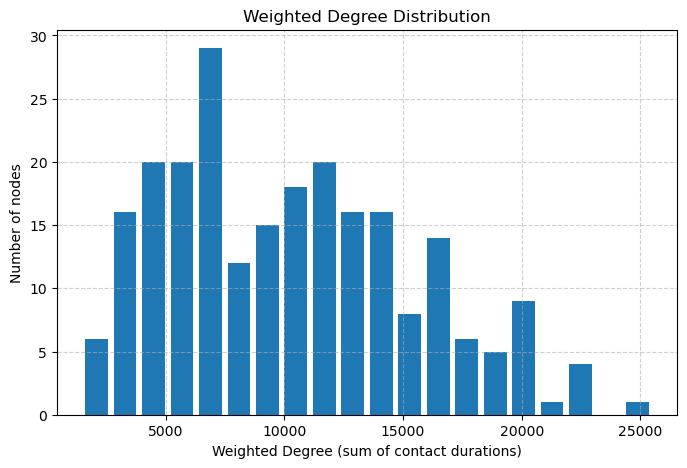

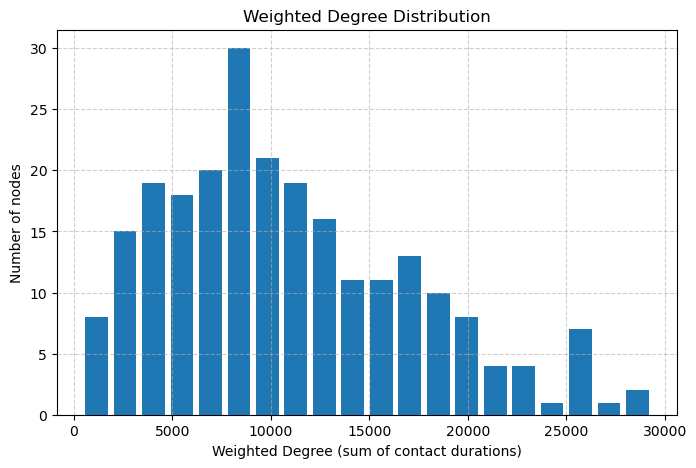

In [9]:
# Calcul du degré de distribution pondéré (somme des 'duration' pour chaque noeud) donc ici le temps total de contact d'un individu avec tous les autres.

#Jour 1

weighted_degrees1 = [d for n, d in G1.degree(weight="duration")]

plt.figure(figsize=(8, 5))
plt.hist(weighted_degrees1, bins=20, rwidth=0.8)

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree (sum of contact durations)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Jour 2

weighted_degrees2 = [d for n, d in G2.degree(weight="duration")]

plt.figure(figsize=(8, 5))
plt.hist(weighted_degrees2, bins=20, rwidth=0.8)

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree (sum of contact durations)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

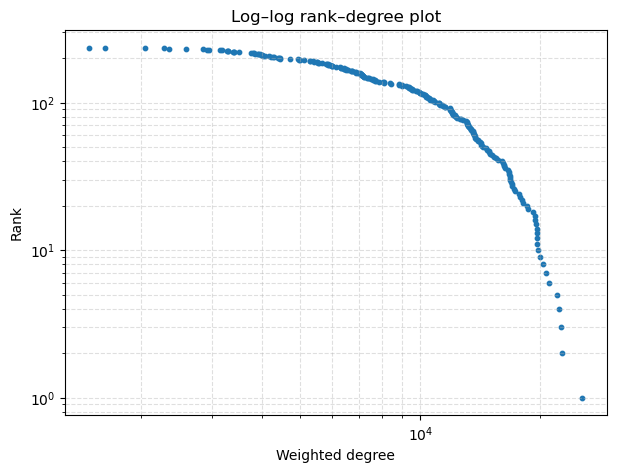

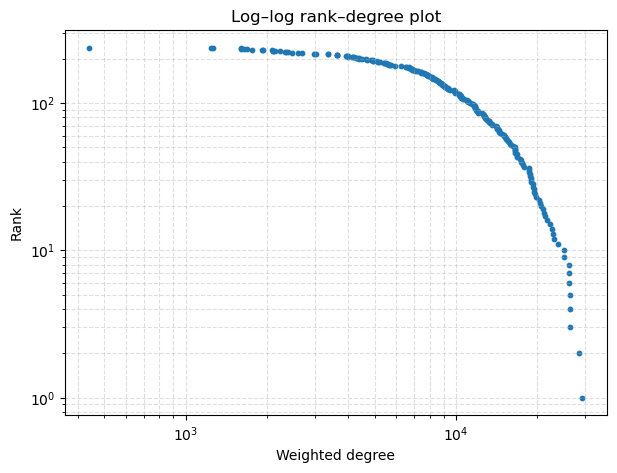

In [10]:
# Identification d'une power law pour les degrés pondérés? Pas de Power Law ici.

#Jour 1

weighted_degrees1_sorted = np.sort(weighted_degrees1)[::-1]
ranks = np.arange(1, len(weighted_degrees1_sorted) + 1)

plt.figure(figsize=(7,5))
plt.scatter(weighted_degrees1_sorted, ranks, s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weighted degree")
plt.ylabel("Rank")
plt.title("Log–log rank–degree plot")
plt.grid(True, which="both", linestyle='--', alpha=0.4)
plt.show()

#Jour 2

weighted_degrees2_sorted = np.sort(weighted_degrees2)[::-1]
ranks = np.arange(1, len(weighted_degrees2_sorted) + 1)

plt.figure(figsize=(7,5))
plt.scatter(weighted_degrees2_sorted, ranks, s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weighted degree")
plt.ylabel("Rank")
plt.title("Log–log rank–degree plot")
plt.grid(True, which="both", linestyle='--', alpha=0.4)
plt.show()

C. Coefficient de clustering


In [11]:
#  JOUR 1
# 
# clustering non pondéré moyen
avg_clust1 = nx.average_clustering(G1)
print("Average clustering (unweighted) :", avg_clust1)

# clustering pondéré moyen
avg_clust1_w = nx.average_clustering(G1, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust1_w)

# Local clustering coefficients (non pondéré)
clust_nodes1 = nx.clustering(G1) 


# Local clustering coefficients (pondéré)
clust_nodes1_w = nx.clustering(G1, weight="duration")

nx.set_node_attributes(G1, clust_nodes1, "clustering")
nx.set_node_attributes(G1, clust_nodes1_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat1 = nx.get_node_attributes(G1, "classname")

# Construction dataframe
dfc1 = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [cat1.get(n, "NA") for n in G1.nodes()],
    "clustering": [clust_nodes1[n] for n in G1.nodes()],
    "clustering_w": [clust_nodes1_w[n] for n in G1.nodes()]
})

# Moyennes par catégorie
by_cat1 = dfc1.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat1)

Average clustering (unweighted) : 0.5018529176737266
Average clustering (weighted, weight='duration') : 0.007854216893789383
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.449932  0.421907    22     0.006363  0.005934
1B          0.559331  0.487245    25     0.013976  0.011815
2A          0.482786  0.455027    22     0.005752  0.005253
2B          0.551385  0.551920    25     0.008760  0.007543
3A          0.461838  0.432157    23     0.005456  0.005213
3B          0.441031  0.418039    21     0.006686  0.006878
4A          0.535217  0.471545    21     0.011352  0.008829
4B          0.465171  0.429825    22     0.005578  0.004971
5A          0.522065  0.506616    22     0.006961  0.006185
5B          0.536445  0.512545    23     0.006952  0.006585
Teachers    0.496867  0.481774    10     0.007862  0.005944


In [12]:
# JOUR 2
# 
# clustering non pondéré moyen
avg_clust2 = nx.average_clustering(G2)
print("Average clustering (unweighted) :", avg_clust2)

# clustering pondéré moyen
avg_clust2_w = nx.average_clustering(G2, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust2_w)

# Local clustering coefficients (non pondéré)
clust_nodes2 = nx.clustering(G2) 


# Local clustering coefficients (pondéré)
clust_nodes2_w = nx.clustering(G2, weight="duration")

nx.set_node_attributes(G2, clust_nodes2, "clustering")
nx.set_node_attributes(G2, clust_nodes2_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat2 = nx.get_node_attributes(G2, "classname")

# Construction dataframe
dfc2 = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [cat2.get(n, "NA") for n in G2.nodes()],
    "clustering": [clust_nodes2[n] for n in G2.nodes()],
    "clustering_w": [clust_nodes2_w[n] for n in G2.nodes()]
})

# Moyennes par catégorie
by_cat2 = dfc2.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat2)

Average clustering (unweighted) : 0.559558532849634
Average clustering (weighted, weight='duration') : 0.010547983810277462
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.496788  0.452347    23     0.006868  0.006079
1B          0.461910  0.413165    25     0.011152  0.009112
2A          0.536808  0.503017    23     0.014663  0.012103
2B          0.641347  0.593909    26     0.013039  0.011712
3A          0.559206  0.526776    23     0.009765  0.009238
3B          0.547581  0.532656    21     0.011995  0.010486
4A          0.565185  0.471264    21     0.008150  0.007421
4B          0.624955  0.650753    22     0.007096  0.006660
5A          0.522142  0.495510    21     0.011113  0.009649
5B          0.636142  0.502674    23     0.010782  0.008488
Teachers    0.560434  0.485586    10     0.011227  0.011401


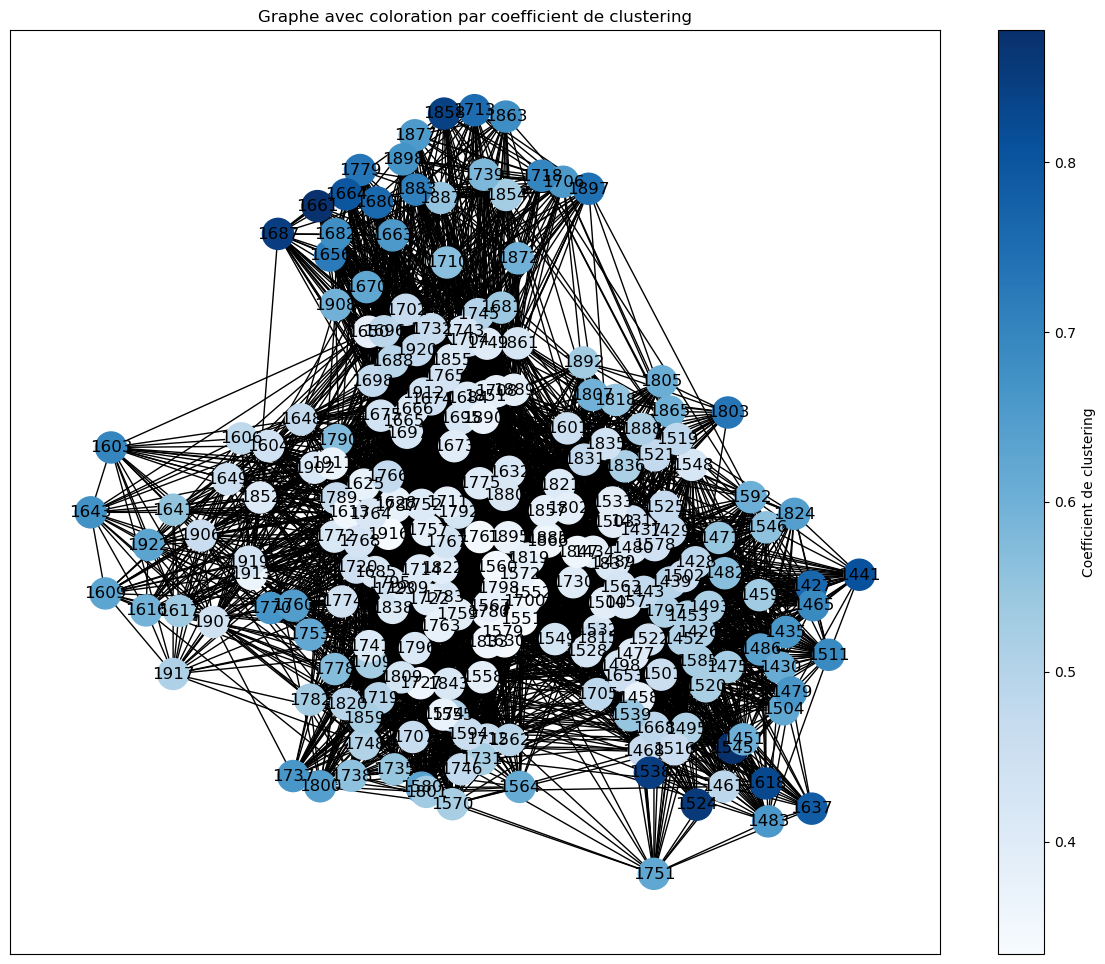

Le coefficient de clustering moyen est : 0.5018529176737266


In [13]:
# Autre visualisation: un graphe avec coloration par coefficient de clustering, pour le Jour 1

import matplotlib as mpl

clustering_coeffs = nx.clustering(G1)

# 2. Préparer les couleurs
colors = [clustering_coeffs[node] for node in G1.nodes()]

# 3. Créer une disposition
pos = nx.spring_layout(G1)

plt.figure(figsize=(15,12))

# 4. Dessiner le graphe en récupérant l'axe courant
ax = plt.gca()

nodes = nx.draw_networkx_nodes(G1, pos,
                               node_color=colors,
                               cmap=plt.cm.Blues,
                               node_size=500,
                               ax=ax)

nx.draw_networkx_edges(G1, pos, ax=ax)
nx.draw_networkx_labels(G1, pos, ax=ax, font_size=12)

plt.title("Graphe avec coloration par coefficient de clustering")

# Créer un ScalarMappable avec la même cmap et une normalisation adaptée
sm = mpl.cm.ScalarMappable(cmap=plt.cm.Blues, 
                           norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])

# Ajouter la colorbar en précisant l'axe
plt.colorbar(sm, label="Coefficient de clustering", ax=ax)

plt.show()

# Calculer le coefficient de clustering moyen
avg_clustering = nx.average_clustering(G1)
print(f"Le coefficient de clustering moyen est : {avg_clustering}")



D. Mesures de centralité

In [26]:
# --- Centralités pondérées ---

# Jour 1
degree1 = dict(G1.degree(weight="duration"))

betw1 = nx.betweenness_centrality(G1, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G1_for_closeness = G1.copy()
for u, v, d in G1_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close1 = nx.closeness_centrality(G1_for_closeness, distance="inv_duration")

pagerank1 = nx.pagerank(G1, weight="duration")

katz_centrality = nx.katz_centrality( G1,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df1_cent = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]["classname"] for n in G1.nodes()],
    "degree": [degree1[n] for n in G1.nodes()],
    "betweenness": [betw1[n] for n in G1.nodes()],
    "closeness": [close1[n] for n in G1.nodes()],
    "pagerank": [pagerank1[n] for n in G1.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G1.nodes()]
})

df1_cent.head()






node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    5900     0.005414  173.847865  0.002716         0.061141
1  1780        3A   13380     0.013200  233.535643  0.005533         0.097007
2  1782        3A    5300     0.007497  178.861499  0.002671         0.058135
3  1783        1A    8060     0.004084  197.509086  0.003468         0.063642
4  1787        1A   15980     0.017755  204.749243  0.005857         0.080840

In [28]:

# Jour 2
degree2 = dict(G2.degree(weight="duration"))

betw2 = nx.betweenness_centrality(G2, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G2_for_closeness = G2.copy()
for u, v, d in G2_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close2 = nx.closeness_centrality(G2_for_closeness, distance="inv_duration")

pagerank2 = nx.pagerank(G2, weight="duration")

katz_centrality = nx.katz_centrality( G2,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df2_cent = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [G2.nodes[n]["classname"] for n in G2.nodes()],
    "degree": [degree2[n] for n in G2.nodes()],
    "betweenness": [betw2[n] for n in G2.nodes()],
    "closeness": [close2[n] for n in G2.nodes()],
    "pagerank": [pagerank2[n] for n in G2.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G2.nodes()]
})

df2_cent.head()

node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    7900     0.008573  178.388960  0.003781         0.066501
1  1780        3A   17300     0.007664  214.690491  0.005789         0.087474
2  1782        3A   12840     0.004487  184.560484  0.004424         0.073898
3  1783        1A    8140     0.011938  177.887790  0.004111         0.062453
4  1787        1A    4680     0.001677  161.335204  0.002630         0.050979

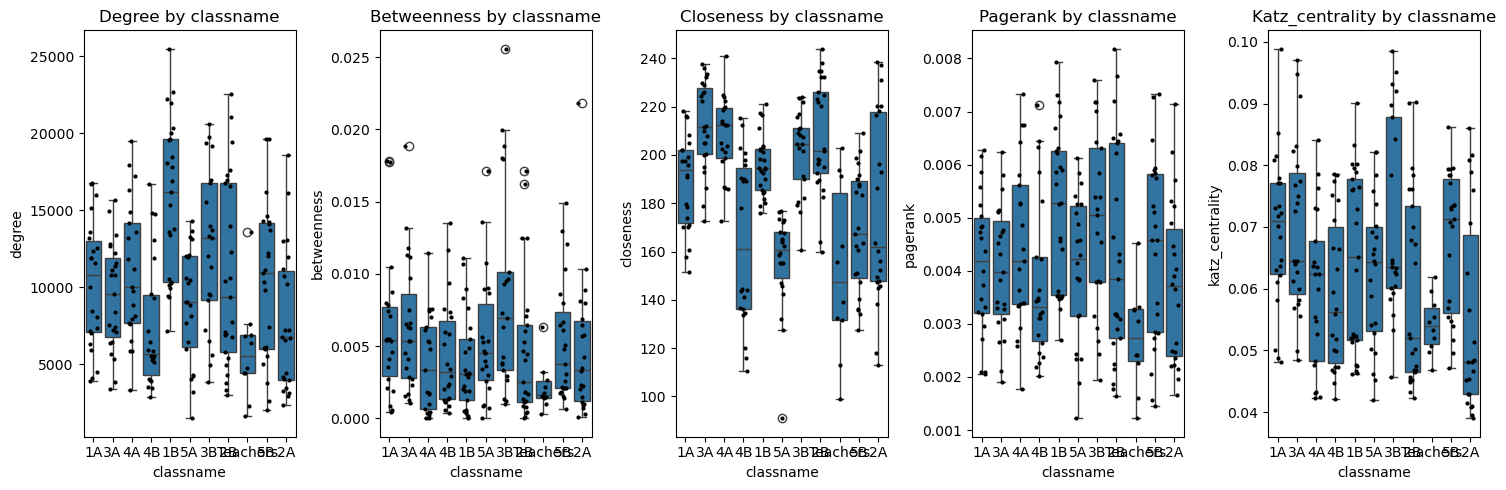

In [ ]:
# JOUR 1

# ??? COMMENT ajouter les boxplot du jour 2 dans le même graphe chaque fois?

import seaborn as sns
import matplotlib.pyplot as plt

centralities = ["degree", "betweenness", "closeness", "pagerank", "katz_centrality"]

plt.figure(figsize=(15, 5))
for i, c in enumerate(centralities, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df1_cent, x="classname", y=c)
    sns.stripplot(data=df1_cent, x="classname", y=c, color="black", size=3, jitter=0.2)
    plt.title(f"{c.capitalize()} by classname")
plt.tight_layout()
plt.show()

### Modèle de réseau

In [ ]:
# -------------------------------------------------------------------
# Helper: plotting distributions
# -------------------------------------------------------------------
def plot_distribution(data_real, data_model, title, xlabel):
    plt.figure(figsize=(6,4))
    plt.hist(data_real, bins=30, alpha=0.6, label='Réel')
    plt.hist(data_model, bins=30, alpha=0.6, label='Modèle')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Fréquence")
    plt.legend()
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# Helper: compute metrics for a graph
# -------------------------------------------------------------------
def compute_metrics(G):
    metrics = {}

    # Degree

    metrics["degree"] = [d for _, d in G.degree()]

    # Weighted degree (sum of weights)
    if nx.get_edge_attributes(G, "t"):
        metrics["weighted_degree"] = [sum(d["t"] for _, _, d in G.edges(n, data=True)) for n in G.nodes()]
    else:
        metrics["weighted_degree"] = None

    # Clustering
    metrics["clustering"] = list(nx.clustering(G, weight="t").values())

    # Betweenness
    metrics["betweenness"] = list(nx.betweenness_centrality(G, weight="inv_t").values()) \
        if nx.get_edge_attributes(G, "inv_t") else list(nx.betweenness_centrality(G).values())

    # Closeness
    metrics["closeness"] = list(nx.closeness_centrality(G, distance="inv_t").values()) \
        if nx.get_edge_attributes(G, "inv_t") else list(nx.closeness_centrality(G).values())

    # PageRank
    metrics["pagerank"] = list(nx.pagerank(G, weight="t").values()) \
        if nx.get_edge_attributes(G, "t") else list(nx.pagerank(G).values())

    # Edge weights
    metrics["weights"] = [d["t"] for _,_,d in G.edges(data=True)] \
        if nx.get_edge_attributes(G, "t") else None

    return metrics
# Ajoute des distances inverses pour pondérer les centralités
for u,v,d in G.edges(data=True):
    if d["t"] > 0:
        d["inv_t"] = 1/d["t"]
    else:
        d["inv_t"] = 0.000001

metrics_real = compute_metrics(G)

# -------------------------------------------------------------------
# 2. Generate comparable random models
# -------------------------------------------------------------------
n = G.number_of_nodes()
m = G.number_of_edges()

# --- Erdős–Rényi ---
p = (2*m) / (n*(n-1))
G_er = nx.erdos_renyi_graph(n, p)

# --- Configuration model (preserves degree sequence) ---
degree_seq = [d for _, d in G.degree()]
G_cfg_multi = nx.configuration_model(degree_seq)
G_cfg = nx.Graph(G_cfg_multi)   # remove parallel edges
G_cfg.remove_edges_from(nx.selfloop_edges(G_cfg))

# --- Preferential attachment (Barabási–Albert) ---
avg_degree = int(np.mean(degree_seq)//2) 
avg_degree = max(1, avg_degree)
G_ba = nx.barabasi_albert_graph(n, avg_degree)

# -------------------------------------------------------------------
# 3. Compute metrics for all models
# -------------------------------------------------------------------
metrics_er  = compute_metrics(G_er)
metrics_cfg = compute_metrics(G_cfg)
metrics_ba  = compute_metrics(G_ba)

# -------------------------------------------------------------------
# 4. Plot comparisons
# -------------------------------------------------------------------
def compare_model(metrics_real, metrics_model, model_name):
    print(f"\n=== Comparaison avec modèle {model_name} ===")

    plot_distribution(metrics_real["degree"], metrics_model["degree"],
                      f"{model_name} – Degré", "degré")

    if metrics_real["clustering"] and metrics_model["clustering"]:
        plot_distribution(metrics_real["clustering"], metrics_model["clustering"],
                          f"{model_name} – Clustering", "coefficient")

    plot_distribution(metrics_real["betweenness"], metrics_model["betweenness"],
                      f"{model_name} – Betweenness", "centralité")

    plot_distribution(metrics_real["closeness"], metrics_model["closeness"],
                      f"{model_name} – Closeness", "centralité")

    if metrics_real["weights"] and metrics_model["weights"]:
        plot_distribution(metrics_real["weights"], metrics_model["weights"],
                          f"{model_name} – Distribution des poids", "poids")
        

# -------------------------------------------------------------------
# 5. RUN ALL COMPARISONS
# -------------------------------------------------------------------
compare_model(metrics_real, metrics_er,  "Erdős–Rényi")
compare_model(metrics_real, metrics_cfg, "Configuration Model")
compare_model(metrics_real, metrics_ba,  "Barabási–Albert")


 ### Détection de communautés
 

Nombre de communautés détectées : 11


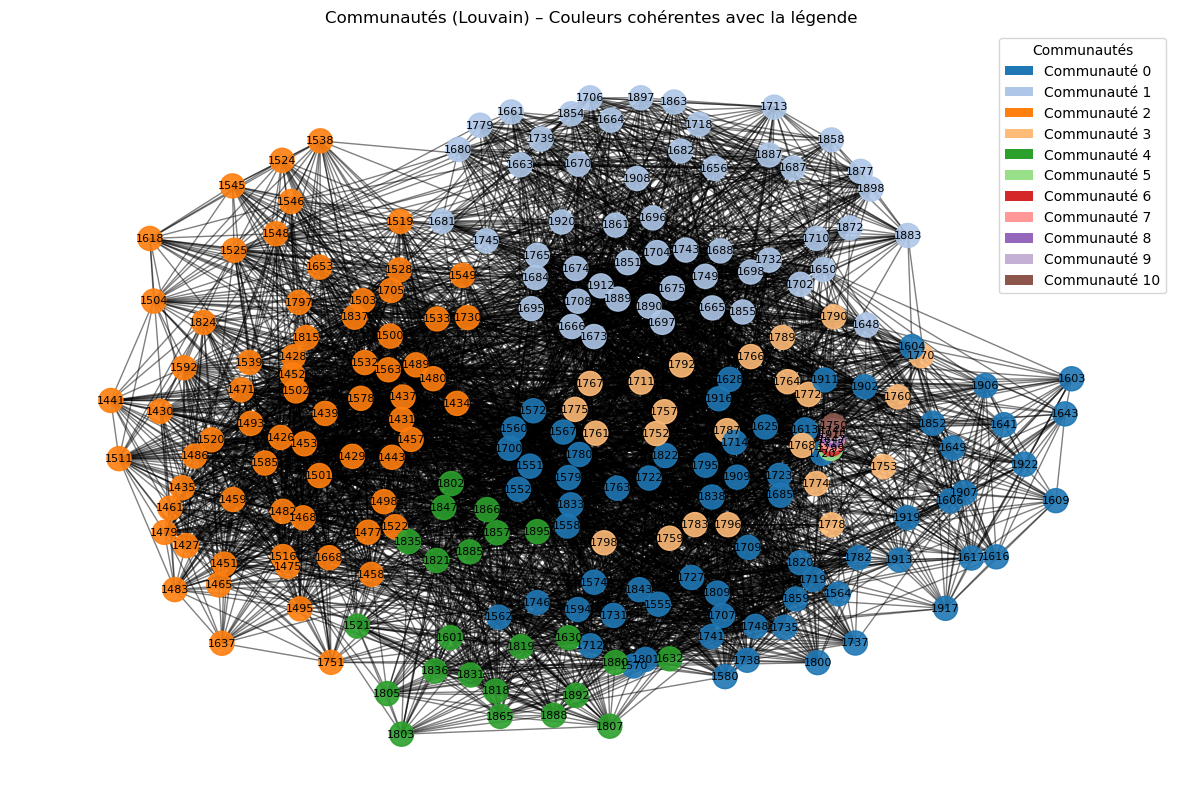

In [ ]:
from matplotlib.patches import Patch
import numpy as np

# --- Détection des communautés ---
communities = nx.community.louvain_communities(G1, seed=42)
n_communities = len(communities)
print("Nombre de communautés détectées :", n_communities)

# Associer chaque nœud à un numéro de communauté
node_to_comm = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = i

# --- Générer UNE couleur par communauté ---
cmap = plt.cm.tab20  # palette catégorielle
colors_for_comms = {i: cmap(i % 20) for i in range(n_communities)}

# Couleur de chaque nœud dans l'ordre du graphe
color_list = [colors_for_comms[node_to_comm[node]] for node in G1.nodes()]

# --- Layout ---
pos1 = nx.kamada_kawai_layout(G1)

# --- Tracé ---
plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(
    G1, pos1,
    node_color=color_list,
    node_size=300,
    alpha=0.9
)

nx.draw_networkx_edges(G1, pos1, alpha=0.5)

nx.draw_networkx_labels(G1, pos1, font_size=8)

plt.title("Communautés (Louvain) ")

# --- Légende ---
legend_elements = [
    Patch(facecolor=colors_for_comms[i], label=f"Communauté {i}")
    for i in range(n_communities)
]

plt.legend(handles=legend_elements, title="Communautés", loc="best")
plt.axis("off")
plt.show()




In [16]:


mod = louvain_communities.modularity(partition, G1, weight="duration")
print("Modularité =", mod)



NameError: name 'louvain_communities' is not defined

In [ ]:
"""Mesure du diamètre du graphe"""

nx.diameter(G)

3